In [205]:
import pandas as pd
import numpy as np

X = pd.read_csv("final_tf.csv")

In [206]:
pd.set_option('display.max_columns', None)
X.head()

,Unnamed: 0,Unnamed: 0_x,id,host_is_superhost,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,number_of_reviews,review_scores_value,sentiment,room_type,property_type,Unnamed: 0_y,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9,tfidf_10,tfidf_11,tfidf_12,tfidf_13,tfidf_14,tfidf_15,tfidf_16,tfidf_17,tfidf_18,tfidf_19,tfidf_20,tfidf_21,tfidf_22,tfidf_23,tfidf_24,tfidf_25,tfidf_26,tfidf_27,tfidf_28,tfidf_29,tfidf_30,tfidf_31,tfidf_32,tfidf_33,tfidf_34,tfidf_35,tfidf_36,tfidf_37,tfidf_38,tfidf_39,tfidf_40,tfidf_41,tfidf_42,tfidf_43,tfidf_44,tfidf_45,tfidf_46,tfidf_47,tfidf_48,tfidf_49,tfidf_50,tfidf_51,tfidf_52,tfidf_53,tfidf_54,tfidf_55,tfidf_56,tfidf_57,tfidf_58,tfidf_59,tfidf_60,tfidf_61,tfidf_62,tfidf_63,tfidf_64,tfidf_65,tfidf_66,tfidf_67,tfidf_68,tfidf_69,tfidf_70,tfidf_71,tfidf_72,tfidf_73,tfidf_74,tfidf_75,tfidf_76,tfidf_77,tfidf_78,tfidf_79,tfidf_80,tfidf_81,tfidf_82,tfidf_83,tfidf_84,tfidf_85,tfidf_86,tfidf_87,tfidf_88,tfidf_89,tfidf_90,tfidf_91,tfidf_92,tfidf_93,tfidf_94,tfidf_95,tfidf_96,tfidf_97,tfidf_98,tfidf_99,tfidf_100,tfidf_101,tfidf_102,tfidf_103,tfidf_104,tfidf_105,tfidf_106,tfidf_107,tfidf_108,tfidf_109,tfidf_110,tfidf_111,tfidf_112,tfidf_113,tfidf_114,tfidf_115,tfidf_116,tfidf_117,tfidf_118,tfidf_119,tfidf_120,tfidf_121,tfidf_122,tfidf_123,tfidf_124,tfidf_125,tfidf_126,tfidf_127,tfidf_128,tfidf_129,tfidf_130,tfidf_131,tfidf_132,tfidf_133,tfidf_134,tfidf_135,tfidf_136,tfidf_137,tfidf_138,tfidf_139,tfidf_140,tfidf_141,tfidf_142,tfidf_143,tfidf_144,tfidf_145,tfidf_146,tfidf_147,tfidf_148,tfidf_149,tfidf_150,tfidf_151,tfidf_152,tfidf_153,tfidf_154,tfidf_155,tfidf_156,tfidf_157,tfidf_158,tfidf_159,tfidf_160,tfidf_161,tfidf_162,tfidf_163,tfidf_164,tfidf_165,tfidf_166,tfidf_167,tfidf_168,tfidf_169,tfidf_170,tfidf_171,tfidf_172,tfidf_173,tfidf_174,tfidf_175,tfidf_176,tfidf_177,tfidf_178,tfidf_179,tfidf_180,tfidf_181,tfidf_182,tfidf_183,tfidf_184,tfidf_185,tfidf_186,tfidf_187,tfidf_188,tfidf_189,tfidf_190,tfidf_191,tfidf_192,tfidf_193,tfidf_194,tfidf_195,tfidf_196,tfidf_197,tfidf_198,tfidf_199,tfidf_200,tfidf_201,tfidf_202,tfidf_203,tfidf_204,tfidf_205,tfidf_206,tfidf_207,tfidf_208,tfidf_209,tfidf_210,tfidf_211,tfidf_212,tfidf_213,tfidf_214,tfidf_215,tfidf_216,tfidf_217,tfidf_218,tfidf_219,tfidf_220,tfidf_221,tfidf_222,tfidf_223,tfidf_224,tfidf_225,tfidf_226,tfidf_227,tfidf_228,tfidf_229,tfidf_230,tfidf_231,tfidf_232,tfidf_233,tfidf_234,tfidf_235,tfidf_236,tfidf_237,tfidf_238,tfidf_239,tfidf_240,tfidf_241,tfidf_242,tfidf_243,tfidf_244,tfidf_245,tfidf_246,tfidf_247,tfidf_248,tfidf_249,tfidf_250,tfidf_251,tfidf_252,tfidf_253,tfidf_254,tfidf_255,tfidf_256,tfidf_257,tfidf_258,tfidf_259,tfidf_260,tfidf_261,tfidf_262,tfidf_263,tfidf_264,tfidf_265,tfidf_266,tfidf_267,tfidf_268,tfidf_269,tfidf_270,tfidf_271,tfidf_272,tfidf_273,tfidf_274,tfidf_275,tfidf_276,tfidf_277,tfidf_278,tfidf_279,tfidf_280,tfidf_281,tfidf_282,tfidf_283,tfidf_284,tfidf_285,tfidf_286,tfidf_287,tfidf_288,tfidf_289,tfidf_290,tfidf_291,tfidf_292,tfidf_293,tfidf_294,tfidf_295,tfidf_296,tfidf_297,tfidf_298,tfidf_299,tfidf_300,tfidf_301,tfidf_302,tfidf_303,tfidf_304,tfidf_305,tfidf_306,tfidf_307,tfidf_308,tfidf_309,tfidf_310,tfidf_311,tfidf_312,tfidf_313,tfidf_314,tfidf_315,tfidf_316,tfidf_317,tfidf_318,tfidf_319,tfidf_320,tfidf_321,tfidf_322,tfidf_323,tfidf_324,tfidf_325,tfidf_326,tfidf_327,tfidf_328,tfidf_329,tfidf_330,tfidf_331,tfidf_332,tfidf_333,tfidf_334,tfidf_335,tfidf_336,tfidf_337,tfidf_338,tfidf_339,tfidf_340,tfidf_341,tfidf_342,tfidf_343,tfidf_344,tfidf_345,tfidf_346,tfidf_347,tfidf_348,tfidf_349,tfidf_350,tfidf_351,tfidf_352,tfidf_353,tfidf_354,tfidf_355,tfidf_356,tfidf_357,tfidf_358,tfidf_359,tfidf_360,tfidf_361,tfidf_362,tfidf_363,tfidf_364,tfidf_365,tfidf_366,tfidf_367,tfidf_368,tfidf_369,tfidf_370,tfidf_371,tfidf_372,tfidf_373,tfidf_374,tfidf_375,tfidf_376,tfidf_377,tfidf_378,tfidf_379,tfidf_380,tfidf_381,tfidf_382,tfidf_383,tfidf_384,tfidf_385,tfidf_386,tfidf_387,tfidf_3

In [207]:
X.drop(['id','Unnamed: 0','Unnamed: 0_x','Unnamed: 0_y'], axis=1, inplace=True)

In [208]:
X = pd.DataFrame(X, columns=['host_is_superhost','latitude','longitude','accommodates',
                                      'bathrooms_text','bedrooms','beds','amenities','price','minimum_nights',
                                      'number_of_reviews','review_scores_value','sentiment', 'room_type',
                                      'property_type'])
X.describe()

,host_is_superhost,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,number_of_reviews,review_scores_value,sentiment,room_type,property_type
count,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000
mean,0.168337,53.346537,-6.254579,3.073021,1.329641,1.527409,1.883241,45.424831,138.834995,5.911025,47.944979,4.667053,0.810068,0.557169,1.925343
std,0.374204,0.048753,0.062311,1.953894,0.645618,0.930670,1.419794,26.797861,125.121338,23.662972,76.957648,0.290956,0.138843,0.561713,0.368499
min,0.000000,53.181730,-6.526020,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.500000,-0.892200,0.000000,0.000000
25%,0.000000,53.330890,-6.277900,2.000000,1.000000,1.000000,1.000000,25.000000,60.000000,1.000000,5.000000,4.510000,0.765580,0.000000,2.000000
50%,0.000000,53.344340,-6.259980,2.000000,1.000000,1.000000,1.000000,40.000000,99.000000,2.000000,18.000000,4.720000,0.840361,1.000000,2.000000
75%,0.000000,53.357190,-6.233830,4.000000,1.500000,2.000000,2.000000,58.000000,169.000000,3.000000,55.000000,4.880000,0.895783,1.000000,2.000000
max,1.000000,53.635000,-6.052910,16.000000,9.500000,13.000000,18.000000,176.000000,999.000000,800.000000,770.000000,5.000000,0.994000,3.000000,2.000000


In [209]:
all2 = []
all3 = []
all4 = []
for index, row in X.iterrows():
    sen = row['number_of_reviews'] * row['sentiment']
    tp = row['price'] * row['minimum_nights']
    rating = row['sentiment'] * row['review_scores_value']
    all2.append(sen)
    all3.append(tp)
    all4.append(rating)

X['rvw_sent_mod'] = all2
X['total_price'] = all3
X['sent_rvw'] = all4

In [210]:
X = X.assign(
    rating_bins = pd.qcut(
        X['sent_rvw'],
        q=4,
        labels=[0,1,2,3]
    )
)

In [211]:
X.drop(['number_of_reviews','minimum_nights','sentiment'], axis=1, inplace=True)

<AxesSubplot:>

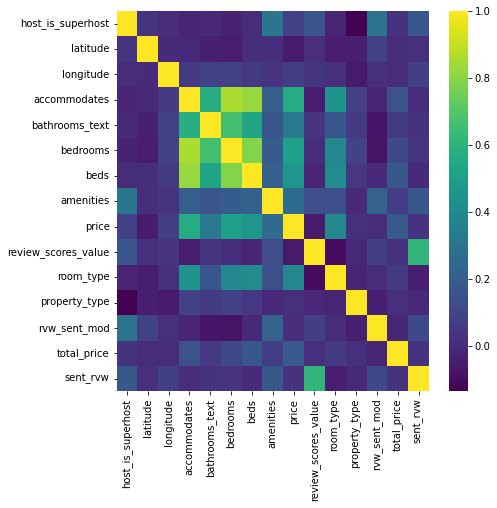

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize= (7,7))
sns.heatmap(X.corr(), annot=False, vmax=1, cmap='viridis', square=False)

In [213]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0, 1))
G = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [214]:
vals = G.drop(labels=['review_scores_value','rating_bins','sent_rvw'],axis=1)
t_val = G['rating_bins']
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(vals, t_val, test_size=0.3, random_state=123)

In [123]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

/Users/pallavit/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/pallavit/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


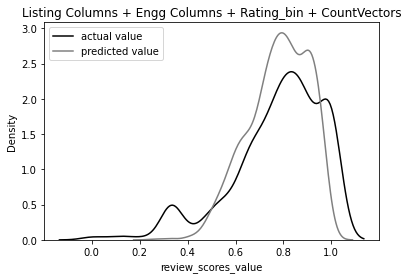

In [124]:
ax1=sns.distplot(y_test,hist=False,color='black',label='actual value')
ax2=sns.distplot(pred,hist=False,color='grey',label='predicted value')
plt.title("Listing Columns + Engg Columns + Rating_bin + CountVectors")
plt.legend()

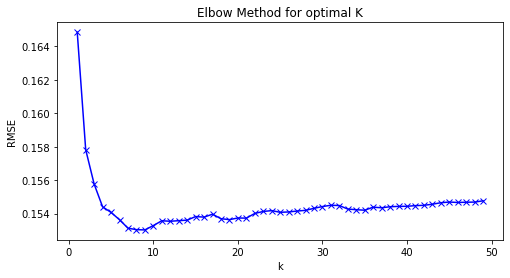

In [106]:
rmse_val = []

from sklearn.metrics import mean_squared_error
from math import sqrt
def count_vec_max_df(params, X_train, y_train):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    error=sqrt(mean_squared_error(y_test,pred)) 
    return error

mylist=list(range(1,50))
# mylist=list(filter(lambda x:x%2!=0,mylist))
for k in mylist:
    rmse_val.append(count_vec_max_df(k, X_train, y_train))
   
#plotting the rmse values against k values
# curve = pd.DataFrame(rmse_val) #elbow curve 
# curve.plot(color='black', label='RMSE')
# plt.title("Only Listing Columns")
# plt.xlabel("K neighbours values")
# plt.ylabel("RMSE Values")

plt.figure(figsize=(8,4))
plt.plot(mylist, rmse_val, 'bx-')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('Elbow Method for optimal K')
plt.show()

In [129]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
print("At k=8")
print("Mean Squared Error = ", (mean_squared_error(y_test, pred)))
print("Root Mean Squared Error = ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2 Score = ", r2_score(y_test, pred))

At k=8
Mean Squared Error =  0.023828387487692185
Root Mean Squared Error =  0.15436446316329475
R2 Score =  0.3665655284124666


In [153]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[0.000001, 0.0001,0.001,0.01, 0.05, 0.1, 0.5, 0, 1, 2,3, 4, 5, 10, 15, 20, 25, 30, 50, 100]}
# define the model/ estimator
model = Ridge()
# define the grid search
Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)
#fit the grid search
Ridge_reg.fit(X_train,y_train)
# best estimator
print(Ridge_reg.best_estimator_)

Ridge(alpha=0.1)


In [154]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
rr = Ridge(alpha=0.1)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print("RMSE train: ", np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print("R2 Score Train: ", r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print("RMSE test: ", np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print("R2 Score test: ", r2_score(y_test, pred_test_rr))

RMSE train:  0.14738916021210172
R2 Score Train:  0.42242742241035613
RMSE test:  0.14681400917057325
R2 Score test:  0.4270166039177258


/Users/pallavit/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/pallavit/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


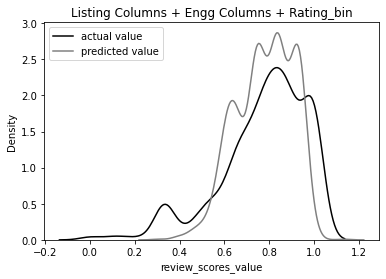

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
ax1=sns.distplot(y_test,hist=False,color='black',label='actual value')
ax2=sns.distplot(pred_test_rr,hist=False,color='gray',label='predicted value')
plt.title("Listing Columns + Engg Columns + Rating_bin")
plt.legend()

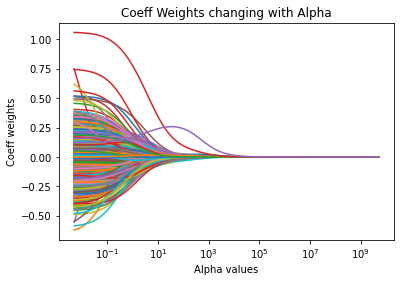

In [142]:
lambda_values = 10**np.linspace(10,-2,100)*0.5
ridge_model = Ridge()
coefficients = []

for i in lambda_values:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    coefficients.append(ridge_model.coef_)
    
ax = plt.gca()
ax.plot(lambda_values, coefficients) 
plt.ylabel("Coeff weights")
plt.xlabel("Alpha values")
plt.title("Coeff Weights changing with Alpha")
ax.set_xscale("log")

In [215]:
from sklearn import preprocessing
from sklearn import utils
#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed_train = lab.fit_transform(y_train)
y_transformed_test = lab.fit_transform(y_test)

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

logit = LogisticRegression(C=1, random_state=0, solver='lbfgs',multi_class='multinomial', max_iter=20000
                              ,penalty = 'l2')
logit.fit(X_train, y_transformed_train)
l_pred = logit.predict(X_test)
print("\n")
print("C = ",1)
print('Train accuracy score:',round(logit.score(X_train, y_transformed_train),4))
print('Test accuracy score:',round(logit.score(X_test, y_transformed_test),4))



C =  1
Train accuracy score: 0.3606
Test accuracy score: 0.3776


In [216]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_transformed_train)
y_onehot_test = label_binarizer.transform(y_transformed_test)
y_onehot_test.shape  # (n_samples, n_classes)

(1467, 4)

In [217]:
label_binarizer.transform(["0"])
label_binarizer.classes_

/Users/pallavit/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


array([0, 1, 2, 3])

In [218]:
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

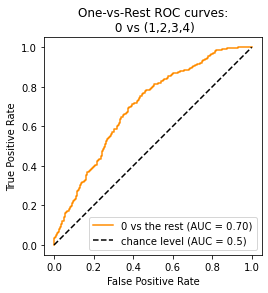

In [219]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

y_score = logit.fit(X_train, y_transformed_train).predict_proba(X_test)

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n 0 vs (1,2,3,4)")
plt.legend()
plt.show()

In [220]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_transformed_test, l_pred))

              precision    recall  f1-score   support

           0       0.37      0.72      0.49       372
           1       0.34      0.23      0.27       360
           2       0.43      0.30      0.35       372
           3       0.38      0.25      0.30       363

    accuracy                           0.38      1467
   macro avg       0.38      0.38      0.35      1467
weighted avg       0.38      0.38      0.36      1467



In [221]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_transformed_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_transformed_test, y_pred))

0.3285616905248807


In [222]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_transformed_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.50      0.42       372
           1       0.29      0.29      0.29       360
           2       0.32      0.28      0.30       372
           3       0.31      0.23      0.27       363

    accuracy                           0.33      1467
   macro avg       0.32      0.33      0.32      1467
weighted avg       0.32      0.33      0.32      1467

